In [1]:

%load_ext autoreload
%autoreload 2

In [2]:

import os
current_directory = os.getcwd()
while current_directory.endswith("Notebooks"):
    os.chdir("..")
    current_directory = os.getcwd()
    print("Current working directory: ", current_directory)

Current working directory:  c:\Users\thomaswi\OneDrive - SINTEF\Drilling and well\Code\CodeForMaster


In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.stats import skew, kurtosis
import scipy as sc
from utils.filepaths.filepaths import (
    FILE_PATH_CASE_101,
    FILE_PATH_CASE_101_HFM_T,
    FILE_PATH_CASE_101_HFM_T_OBS,
    FILE_PATH_CASE_101_HFM_Z,
    FILE_PATH_DRILLING_REPORT_LABELED_CASE_102,
)
from utils.constants.constants import conversion_factor_for_densities
from utils.utils.utils import (
    get_active_drilling_data,
    reading_labeled_drill_report_data,
    extracting_labeled_data_from_dataframe,
    plot_sections,
    plot_with_warnings_down_hole_ecd,
    plot_with_warnings_pack_off_sensor_1_2,
    regression_for_asm_data_points

)
from utils.Classes.Classes.PackOffDetectionAlgorithm import PackOffDetectionAlgorithm
sns.set_theme()

In [4]:
# Loading files
sensor_data = pd.read_pickle(FILE_PATH_CASE_101)
# Extracting the dates to consider
tstamp_min = '2020-07-23 02:45:00+00:00'
tstamp_max = '2020-07-25 02:30:00+00:00'
sensor_data = sensor_data.loc[tstamp_min:tstamp_max]
# First datapoint was removed during pickling of simdata. Have to so the same here
sensor_data = sensor_data.iloc[1:] 
hfm_data_t = pd.read_pickle(FILE_PATH_CASE_101_HFM_T)
hfm_data_t_obs = pd.read_pickle(FILE_PATH_CASE_101_HFM_T_OBS)
hfm_data_z = pd.read_pickle(FILE_PATH_CASE_101_HFM_Z)
hfm_data_t.index = sensor_data.index
hfm_data_t_obs.index = sensor_data.index


In [5]:
# Threshold based on 100 us gpm value to ensure active drilling
threshold_value_flow = 0.0
df_sensor, df_simulated = get_active_drilling_data(df = sensor_data, sim_df=hfm_data_t_obs, include_rop_zeros=True)
# df_sensor = df_sensor[(df_sensor["MUD_FLOW_IN"]) > threshold_value_flow]
df_simulated = df_simulated.loc[df_sensor.index]
df_sensor["DH_PRESS_ECD"] = df_sensor["DH_PRESS_ECD"] / conversion_factor_for_densities
diff_flow = df_sensor["MUD_FLOW_IN"].diff()
diff_rpm = df_sensor["RPM_SURF"].diff()

C:\Users\thomaswi\AppData\Local\Temp\ipykernel_13540\655810903.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sensor["DH_PRESS_ECD"] = df_sensor["DH_PRESS_ECD"] / conversion_factor_for_densities


10608
0.01653098
10.448491986666667
-0.0266084300000001


C:\Users\thomaswi\AppData\Local\Temp\ipykernel_13540\3925333658.py:5: RuntimeWarning: divide by zero encountered in divide
  inclination_1 = np.arccos(df_sensor["ASMTVD1-T"].diff().values / df_sensor["ASMDEP1-T"].diff().values) * 180 / np.pi
C:\Users\thomaswi\AppData\Local\Temp\ipykernel_13540\3925333658.py:5: RuntimeWarning: invalid value encountered in divide
  inclination_1 = np.arccos(df_sensor["ASMTVD1-T"].diff().values / df_sensor["ASMDEP1-T"].diff().values) * 180 / np.pi
C:\Users\thomaswi\AppData\Local\Temp\ipykernel_13540\3925333658.py:5: RuntimeWarning: invalid value encountered in arccos
  inclination_1 = np.arccos(df_sensor["ASMTVD1-T"].diff().values / df_sensor["ASMDEP1-T"].diff().values) * 180 / np.pi
C:\Users\thomaswi\AppData\Local\Temp\ipykernel_13540\3925333658.py:6: RuntimeWarning: divide by zero encountered in divide
  inclination_2 = np.arccos(df_sensor["ASMTVD2-T"].diff().values / df_sensor["ASMDEP2-T"].diff().values) * 180 / np.pi
C:\Users\thomaswi\AppData\Local\Te

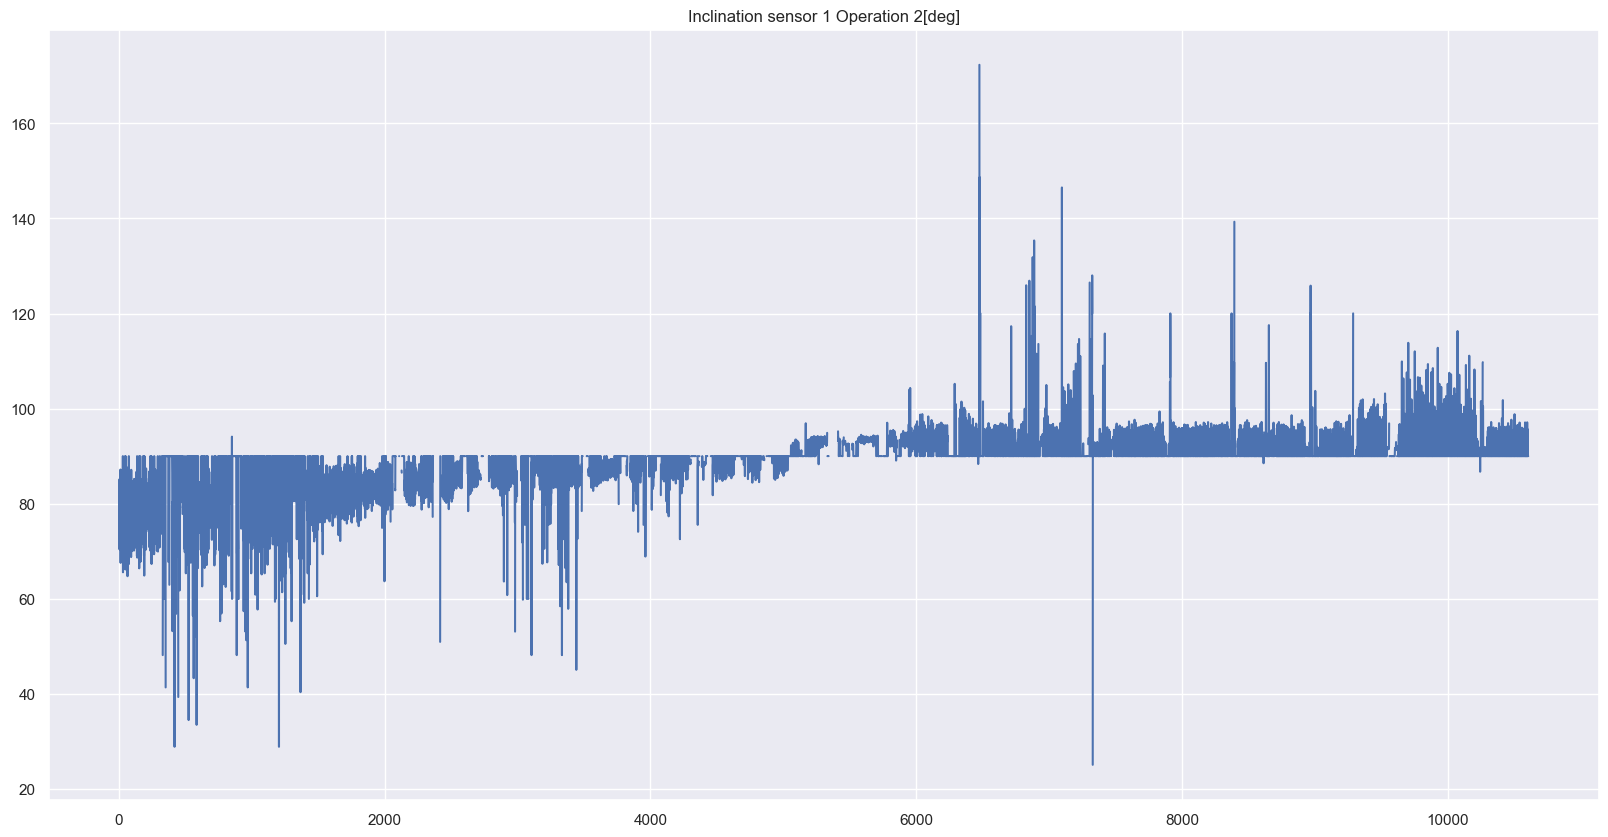

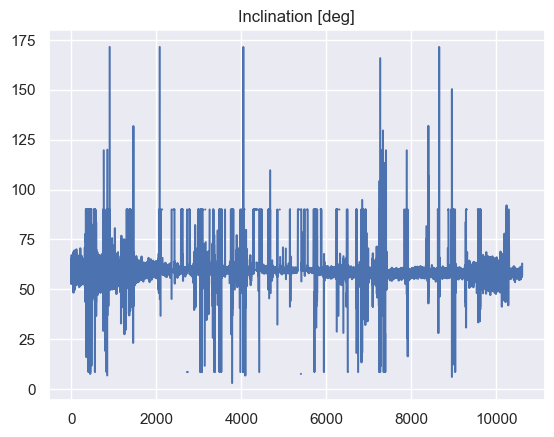

In [12]:
print(len(df_sensor.values))
print(diff_flow.max())
print(diff_rpm.max())
print(diff_flow.min())
inclination_1 = np.arccos(df_sensor["ASMTVD1-T"].diff().values / df_sensor["ASMDEP1-T"].diff().values) * 180 / np.pi
inclination_2 = np.arccos(df_sensor["ASMTVD2-T"].diff().values / df_sensor["ASMDEP2-T"].diff().values) * 180 / np.pi
# inclination_1 = sc.ndimage.uniform_filter1d(inclination_1, size = 10)
plt.figure(figsize = (20,10))
plt.title("Inclination sensor 1 Operation 2[deg]")
plt.plot(inclination_1, label = "ASM sensor 1")
plt.show()
plt.title("Inclination [deg]")
plt.plot(inclination_2, label = "ASM sensor 2")
plt.show()

In [7]:
# Used idx 735 and 5203 in the thesis

transients_idx = [2622, 9033]

In [8]:
# plt.rcParams['text.usetex'] = True
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)
# sns.set_theme()
# transients = []
# ecd_1_segments = []
# ecd_2_segments = []
# ecd_1_segments_sim = []
# ecd_2_segments_sim = []
# window_size = 20
# for index in transients_idx:
#     transients.append([df_sensor.index[index], index])
#     ecd_1_segments.append(df_sensor["ASMECD1-T"].iloc[index - window_size:index + window_size].values)
#     ecd_2_segments.append(df_sensor["ASMECD2-T"].iloc[index - window_size:index + window_size].values)
#     ecd_1_segments_sim.append(df_simulated["ecdAtPos2"].iloc[index - window_size:index + window_size].values)
#     ecd_2_segments_sim.append(df_simulated["ecdAtPos3"].iloc[index - window_size:index + window_size].values)

In [9]:
# for segment_ecd_1, segment_ecd_2, segment_ecd_1_sim, segment_ecd_2_sim, transient in zip(ecd_1_segments, ecd_2_segments, ecd_1_segments_sim, ecd_2_segments_sim, transients):
#     plt.title(f"Transient segment around timestamp {transient[0]} with index {transient[1]}")
#     plt.plot(segment_ecd_1, label = "ASM 1")
#     plt.plot(segment_ecd_2, label = "ASM 2")
#     plt.plot(segment_ecd_1_sim, label = "HFM 1")
#     plt.plot(segment_ecd_2_sim, label = "HFM 2")
#     plt.ylabel(r'$\text{gcm}^{-3}$')
#     plt.legend()
#     plt.show()

In [10]:
# plot_with_warnings_pack_off_sensor_1_2(df_input=df_sensor, df_sim = df_simulated, warnings = transients,chunk_size=500)